In [4]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import *
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [5]:
system_sizes, calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/oom_analysis.pickle")
for c in calculators:
    print("{:<70} went OOM at n={}".format(c.description, c.n))

GNN Neighbor List (stress=True, stresses=True, jit=True)               went OOM at n=3600
GNN Neighbor List (stress=False, stresses=True, jit=True)              went OOM at n=3600
GNN Neighbor List (stress=True, stresses=False, jit=True)              went OOM at n=4000
GNN Neighbor List (stress=False, stresses=False, jit=False)            went OOM at n=4000
JAX-MD Pair (stress=True, stresses=True, jit=True)                     went OOM at n=6336
JAX-MD Pair (stress=False, stresses=True, jit=True)                    went OOM at n=6336
JAX-MD Pair (stress=False, stresses=False, jit=False)                  went OOM at n=6336
GNN Neighbor List (stress=False, stresses=False, jit=True)             went OOM at n=6336
JAX-MD Pair (stress=True, stresses=False, jit=True)                    went OOM at n=13500
JAX-MD Pair (stress=False, stresses=False, jit=True)                   went OOM at n=15360
JAX-MD Neighbor List (stress=True, stresses=True, jit=True)            went OOM at n=15360
JAX-MD 

In [6]:
# TODO: Fix short descriptions to include "Lennard-Jones" (distinguish from GNN)
# GNN: Include Neighbor List?
# remove duplicates but keep correct ordering of appearance
labels = [c.short_description for c in calculators]
labels = sorted(set(labels), key=labels.index)

all_properties = list(map(lambda c: c.n, filter(lambda c: c._stress and c._stresses, calculators)))
only_stress = list(map(lambda c: c.n, filter(lambda c: c._stress and not c._stresses, calculators)))
only_stresses = list(map(lambda c: c.n, filter(lambda c: not c._stress and c._stresses, calculators)))
only_energies_and_forces = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and c._jit, calculators)))
only_energies_and_forces_no_jit = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and not c._jit, calculators)))

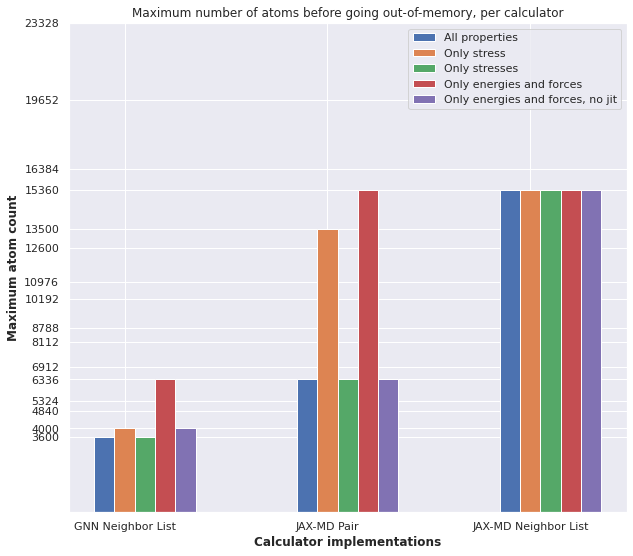

In [7]:
plot_oom_behavior(labels, system_sizes, all_properties, only_stress, only_stresses, only_energies_and_forces, only_energies_and_forces_no_jit, figsize=(10, 9))

## Largest `n` per calculator group
For follow-up benchmarks

In [7]:
max_n_per_calc = {}

for cd in set([c.description for c in calculators]):


    # calcs = filter(lambda c: cd in c.description, calculators)
    # n = min(list(map(lambda c: c.n, calcs)))
    # max_n_per_calc[cd] = n
    
# print(max_n_per_calc)

AttributeError: 'str' object has no attribute 'n'

[6336, 6336, 6336, 13500, 15360, 15360, 15360, 15360, 15360, 15360]


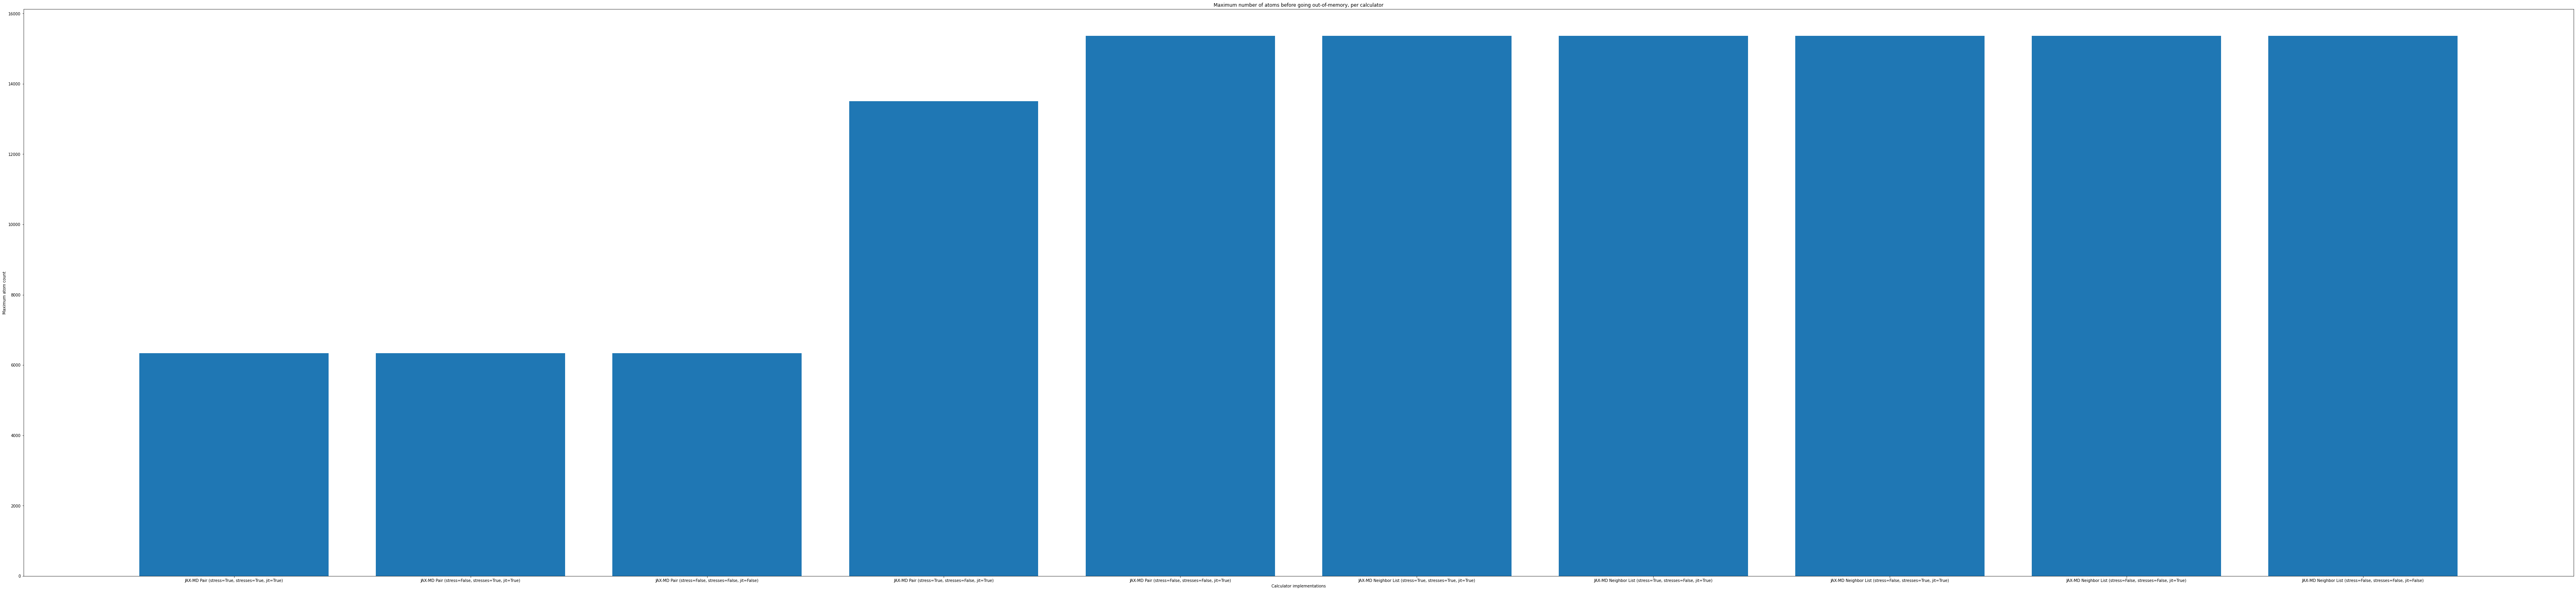

In [5]:
# to verify the previous plot's correctness

# calcs = filter(lambda c: "GNN" in c.description, calculators)
# print(list(calcs))

calcs = list(filter(lambda c: "GNN" not in c.description, calculators))

labels = [c.description for c in calcs]
values = [c.n for c in calcs]

print(values)

calculator_types = set([c.short_description for c in calcs])

fig = plt.figure()
ax = fig.add_axes([0, 0, 15, 5])
ax.bar(labels, values)

ax.set_title("Maximum number of atoms before going out-of-memory, per calculator")
ax.set_xlabel("Calculator implementations")
ax.set_ylabel("Maximum atom count")
# ax.legend()

plt.show()